<a href="https://colab.research.google.com/github/shaan150/Diabetes_Prediction_Model/blob/main/Diabetes_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data Mining & Foundations of AI (Assessment 1)**

# **How accurately can the onset of diabetes be predicted based on health indicators such as Glucose Levels, Blood Pressure, Skin Thickness, Insulin Levels, BMI, Diabetes Pedigree Function, and Age? Furthermore, which of these indicators are most predictive of diabetes, and how do different machine learning models compare in their predictive accuracy?**

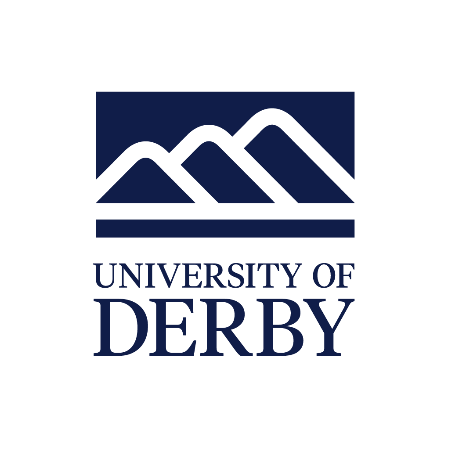

Student Number: 100520142

---


# **Introduction**

The realm of healthcare and disease prevention has become a key area of global focus, particularly with the increasing incidence of diabetes, which significantly impacts the quality of life of individuals across the world. The convergence of data science and medical research has opened up new avenues for predicting and managing health conditions more effectively than ever. This dataset provides a comprehensive resource for exploring the predictive analysis of diabetes, leveraging many health indicators critical in understanding and forecasting the onset of this chronic disease.

The analysis will utilize a dataset to investigate the correlations among various health indicators, including Glucose Levels, Blood Pressure, Skin Thickness, Insulin Levels, Body Mass Index (BMI), Diabetes Pedigree Function, and Age. The aim is to gain insight into how these indicators jointly impact the probability of developing diabetes. This examination plays a critical role in identifying the primary factors contributing to the disease and can aid in devising focused intervention plans for susceptible individuals.

The following file is the dataset that will be used:

  **Healthcare-Diabetes.csv:** The dataset comprises comprehensive health records of numerous individuals meticulously compiled to facilitate the creation of predictive diabetes models. The aim is to conduct an insightful exploratory data analysis (EDA) to understand the data comprehensively. The goal is to identify and address any missing or noisy data, investigate the distribution and correlation of variables, and ultimately draw insightful conclusions that can inform diabetes prevention and management efforts.

Through conducting EDA and implementing pattern recognition analysis, we aim to predict the onset of diabetes using advanced machine learning models. Given the binary nature of the outcome variable (presence or absence of diabetes), classification algorithms will be used. I will meticulously evaluate our model choices, which include support vector machine (SVM), Random Forest, and Logistic Regression, based on various metrics such as accuracy, precision, recall, and other relevant factors. The ultimate goal is to determine the most effective predictive model.

This endeavour aims to demonstrate the capabilities of machine learning in the healthcare industry through the early detection of diabetes. By pinpointing the most influential factors contributing to diabetes and analyzing various models, I aim to offer meaningful perspectives on medical data science. Ultimately, this will facilitate the creation of tailored and precise healthcare remedies.

Through a rigorous and detailed exploration of the dataset, our analysis stands to illuminate the path towards a better understanding of diabetes, paving the way for innovative prevention strategies and enhancing the quality of life for individuals worldwide. This journey through data analysis and model development is not just an academic exercise but a step forward in the battle against diabetes, embodying the potential of data-driven insights to transform healthcare outcomes.


# **Diabetes Data Overview**
This dataset constitutes a comprehensive compilation of health-related attributes collected to assist in developing predictive models for identifying individuals at risk of diabetes. It is a crucial tool for researchers, data scientists, and medical professionals aiming to harness the power of data analytics for diabetes risk assessment and prediction. The dataset offers a unique opportunity to explore the interplay between various health indicators and the likelihood of diabetes onset, thereby contributing to more accurate risk assessments and the formulation of personalized treatment strategies.

The columns in the dataset are detailed as follows:


* **Id**: A unique identifier assigned to each dataset entry, ensuring the data subjects' anonymity and confidentiality.
* Pregnancies: This column records the number of times the individual has been pregnant, highlighting the importance of pregnancy history in diabetes risk assessment.
* **Glucose:** A couple of hours post an oral glucose tolerance test, the plasma glucose concentration. High glucose levels could indicate a higher risk of diabetes, making this a vital indicator.
* **BloodPressure:** The diastolic blood pressure (mm Hg) measurement. Blood pressure readings offer insights into cardiovascular health, closely linked to diabetes risk.
* **SkinThickness:** The triceps skinfold thickness (mm) indirectly measures body fat. Excessive body fat, especially around the abdomen, can increase diabetes risk.
* **Insulin:** The 2-hour serum insulin level (mu U/ml). Insulin resistance or deficiency is a hallmark of diabetes, making this measurement crucial for prediction models.
* **BMI:** Body mass index, calculated as weight in kilograms divided by the square of height in meters (kg/m^2). BMI is a widely used indicator of obesity, a significant risk factor for diabetes.
* **DiabetesPedigreeFunction:** A function that scores the likelihood of diabetes based on family history, acknowledging the genetic component of diabetes risk.
* **Age:** The age of the individual in years. Age is a known risk factor, with the risk of developing type 2 diabetes increasing with age.
* **Outcome:** A binary classification indicating the presence (1) or absence (0) of diabetes. This is the target variable for predictive modelling.


---




# **EDA and Preprocessing**
In the EDA, the aim is to dissect and understand the nuances of the Diabetes Data, employing statistical and visual analysis tools to uncover patterns, trends, and anomalies within the dataset. This preliminary exploration will shed light on the data's structure and quality and inform the subsequent data cleaning and preprocessing steps. Examining the distribution of each variable, identifying potential outliers, and exploring correlations between features will lay a solid foundation for predictive modelling. The insights gained from the EDA will guide our feature selection, inform the choice of machine learning models, and, ultimately, enhance the accuracy and reliability of our diabetes risk predictions.

Through this examination of the Diabetes Data, the analysis seeks to contribute to the broader efforts of combating diabetes by leveraging the power of data science. The findings from the EDA will illuminate the path toward more effective diabetes prediction models, fostering advancements in early diagnosis and personalized diabetes management strategies.

## **Libraries Importing**

In [ ]:
#Analysis Libraries
import matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

# preprocessing libraries
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, train_test_split, learning_curve
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
import time
%matplotlib inline

## **Getting Dataset**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Academic/machine_learning/data_sets/medical/Healthcare-Diabetes.csv', sep=',')

## **Understanding the dataset**

Lets learn about the data

In [ ]:
df.head()

,Id,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,6,148,72,35,0,33.6,0.627,50,1
1,2,1,85,66,29,0,26.6,0.351,31,0
2,3,8,183,64,0,0,23.3,0.672,32,1
3,4,1,89,66,23,94,28.1,0.167,21,0
4,5,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2768 entries, 0 to 2767
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        2768 non-null   int64  
 1   Pregnancies               2768 non-null   int64  
 2   Glucose                   2768 non-null   int64  
 3   BloodPressure             2768 non-null   int64  
 4   SkinThickness             2768 non-null   int64  
 5   Insulin                   2768 non-null   int64  
 6   BMI                       2768 non-null   float64
 7   DiabetesPedigreeFunction  2768 non-null   float64
 8   Age                       2768 non-null   int64  
 9   Outcome                   2768 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 216.4 KB


Before we look further into the data we can remove the ID, as it's not relavent as we don't need a unique identifier for this dataset.

In [ ]:
df=df.drop(columns=["Id"])

**Based on the dataset information, we observe that there are no null values across all columns, which implies a complete dataset without missing entries.**

Additionally, the data types for each column align correctly with the expected type of data they represent (e.g., integers for counts and IDs, floats for measurements with decimal precision), indicating proper data formatting. However, it's important to note that while there are no null values, we must still ensure that there are no placeholders or symbols used to represent missing data (such as '0' for columns where '0' might be biologically implausible, or special characters). A further inspection of the unique values in each column can help confirm the absence of such placeholders.

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000,2768.000000
mean,3.742775,121.102601,69.134393,20.824422,80.127890,32.137392,0.471193,33.132225,0.343931
std,3.323801,32.036508,19.231438,16.059596,112.301933,8.076127,0.325669,11.777230,0.475104
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,37.000000,32.200000,0.375000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.625000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,846.000000,80.600000,2.420000,81.000000,1.000000


### **Inital Analysis**


From the analysis here, it shows that Glucose, BloodPressure, SkinThickness, Insulin, and BMI have zeros, this shouldn't be possible in a live subject as they would be most likely dead, for this model, i will be assuming that this will be treated as missing or data entry errors, as i don't have the context round this. The other columns appear normal, but i will visualize this later once we look at distribution


---



## **Handling Zeros**

We need to understand how many "missing" values there are as that will decide what the best cause of action

In [ ]:
columns_of_interest = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# Counting zeros in each column
zeros_count = {col: (df[col] == 0).sum() for col in columns_of_interest}
print("Number of zeros in each column:")
for column, count in zeros_count.items():
    print(f"{column}: {count}")

Number of zeros in each column:
Glucose: 18
BloodPressure: 125
SkinThickness: 800
Insulin: 1330
BMI: 39


There's a huge amount of zeros particulary the skin thickness (28.9%) and insulin (48%) so i need to be considerate towards my next action before i can do anything. To do this i am going to visualize the data to spot any outliers and links

### **Using Pairplots**

Pairplots, essentially a matrix of scatterplots for each variable pair in the dataset, provide a comprehensive view of the correlations and distributions across different dimensions. This visualization is invaluable for identifying relationships that warrant deeper analysis with more sophisticated machine-learning models. Similarly, scatterplots clarify the relationship between two variables, highlighting correlations, outliers, and trends critical for predictive modelling.
These visualization tools are crucial in machine learning for selecting features significantly impacting the model's performance. By visually assessing the strength and nature of relationships, one can prioritize which features to include or engineer further. The importance of these plots in revealing complex structures within data and aiding in effective decision-making in feature selection and model tuning is well-established in the literature. This approach aligns with best practices in data science to ensure that models are robust and interpretable (McKenna, Meyer, Gregg & Gerber, 2016).

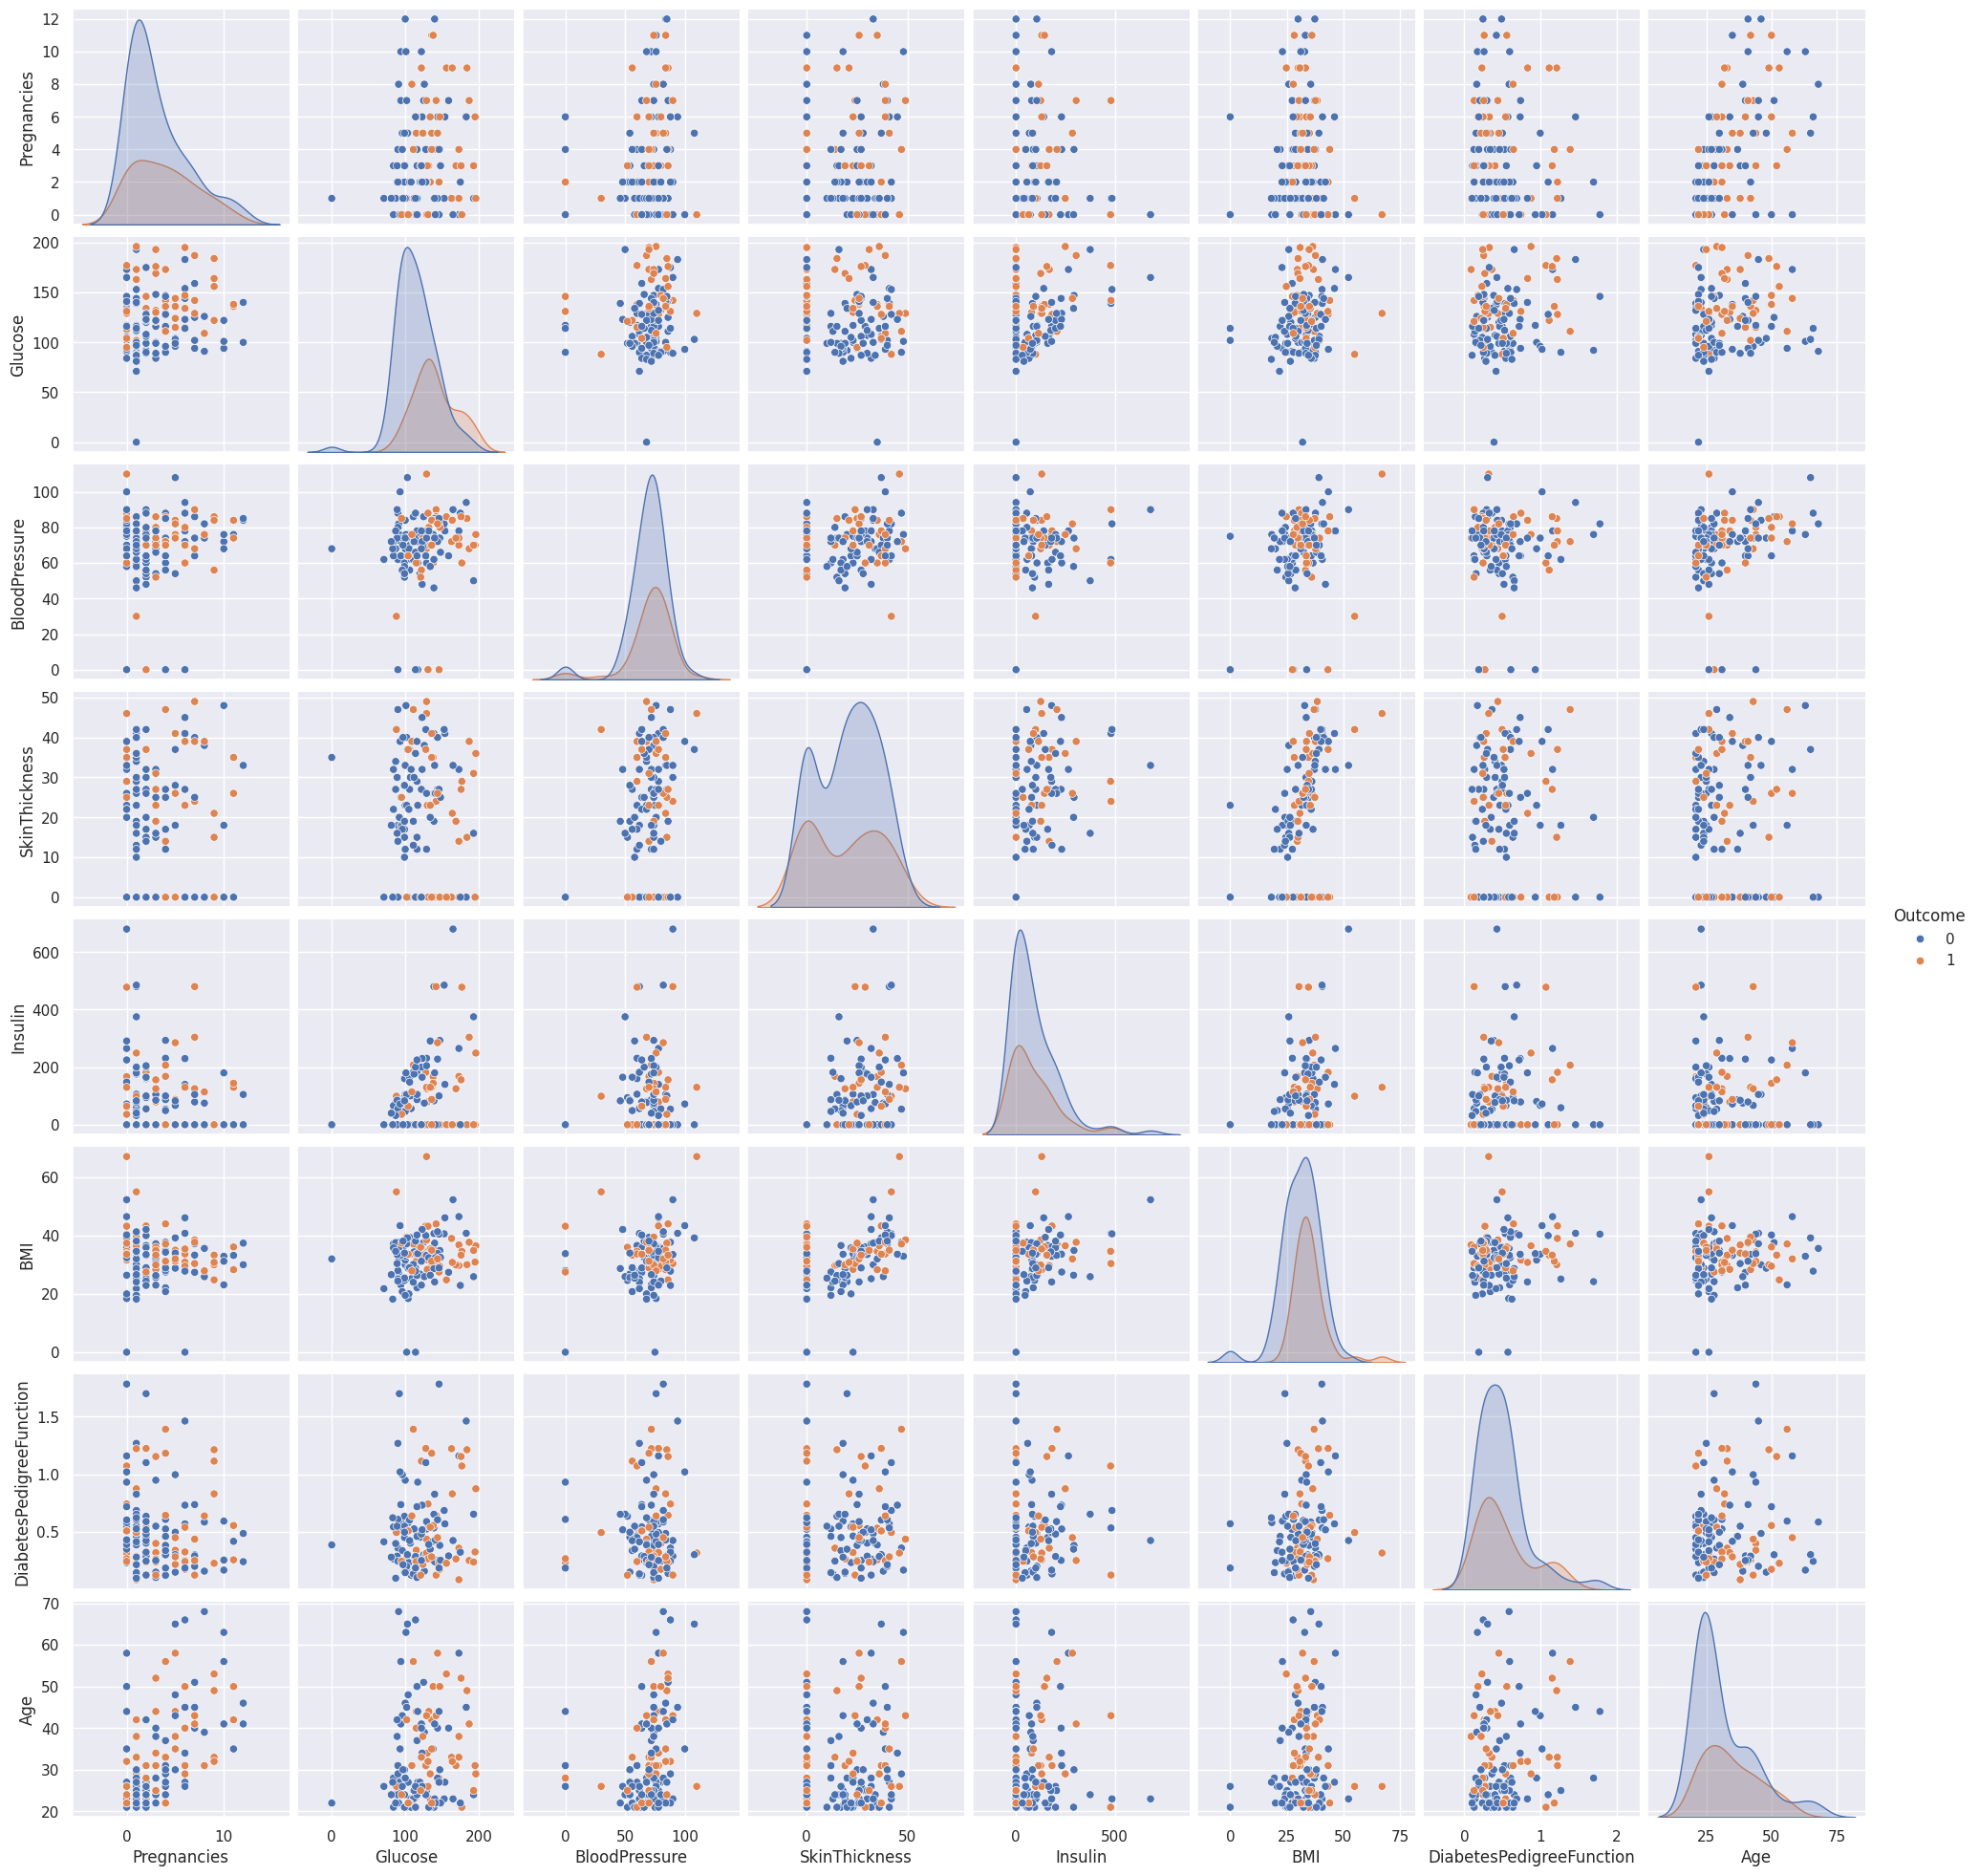

In [ ]:
sns.pairplot(df.sample(frac=0.05), hue='Outcome')

As you can see there's a significant skew in the data as well as zeros, but before we do anything such as imputation, i want to validate if they are potentially duplicates

In [ ]:
# Assuming 'df' is your DataFrame
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 1990


That's a significant number of duplicated rows, before we can continue we need to observe these duplicates

In [ ]:
if duplicates > 0:
    print(df[df.duplicated(keep=False)].sort_values(by=df.columns.tolist()).head())

      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
537             0       57             60              0        0  21.7   
1305            0       57             60              0        0  21.7   
1762            0       57             60              0        0  21.7   
596             0       67             76              0        0  45.3   
1364            0       67             76              0        0  45.3   

      DiabetesPedigreeFunction  Age  Outcome  
537                      0.735   67        0  
1305                     0.735   67        0  
1762                     0.735   67        0  
596                      0.194   46        0  
1364                     0.194   46        0  


### **Removing the zeros**

From what i can see alot of the the zeros that are biologically impossible in a live person are duplicates, so what we can do is remove the data that is duplicates and meets that criteria.

Just on this as well without insulin the body with go into severe hyperglycemia, which is an extremely quick process that leads to death (Basina, 2022), this would mean it's very unlikely that the person would be tested in time, so we'll be treated this as errors. Simiarly, hyperglycemia can be caused by low glucose levels, and this is anything below 70 mg/dL (Funnell, 2021), so this will also be assumed that zero here is an error. Skin thickness cannot be 0 as that would mean you have no skin.

For blood pressure, anything below 90/60 is considered low, and would lead to hypotension, even at this point, it could lead to something fatal such as a heart attack, at zero it would mean that there's a complete failure of the circulatory system and would be fatal (Service, 2023)

In [ ]:
# Criteria for biologically implausible values (customize as needed)
criteria = (df['BloodPressure'] == 0) | (df['Glucose'] == 0) | (df['SkinThickness'] == 0) | (df['Insulin'] == 0) | (df['BMI'] == 0)

# Filter duplicates based on the criteria
duplicates_with_improbable_zeros = df[df.duplicated(keep=False) & criteria]

# Remove these duplicates
df_cleaned = df.drop(duplicates_with_improbable_zeros.index)

print(f"Size of DataFrame after removing specific duplicates: {len(df_cleaned)}")

Size of DataFrame after removing specific duplicates: 1446


In [ ]:
# Assuming 'df' is your DataFrame
duplicates = df_cleaned.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(df_cleaned[df_cleaned.duplicated(keep=False)].sort_values(by=df_cleaned.columns.tolist()).head())

Number of duplicate rows: 1030
      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
466             0       74             52             10       36  27.8   
1234            0       74             52             10       36  27.8   
1704            0       74             52             10       36  27.8   
2293            0       74             52             10       36  27.8   
290             0       78             88             29       40  36.9   

      DiabetesPedigreeFunction  Age  Outcome  
466                      0.269   22        0  
1234                     0.269   22        0  
1704                     0.269   22        0  
2293                     0.269   22        0  
290                      0.434   21        0  


Whilst there's duplicates, i will observe the data first to see if it's there substantial outliers, as well as the remaining duplicates, as observed, do not contain biologically implausible zeros, which suggests that these could be genuine duplicates arising from data entry errors or multiple recordings under the same conditions. Given these duplicates now present healthier, and the size of the dataset being only 1446 rows, i am keen not to remove them, and we'll apply some algorithms that will ensure the data is good quality.

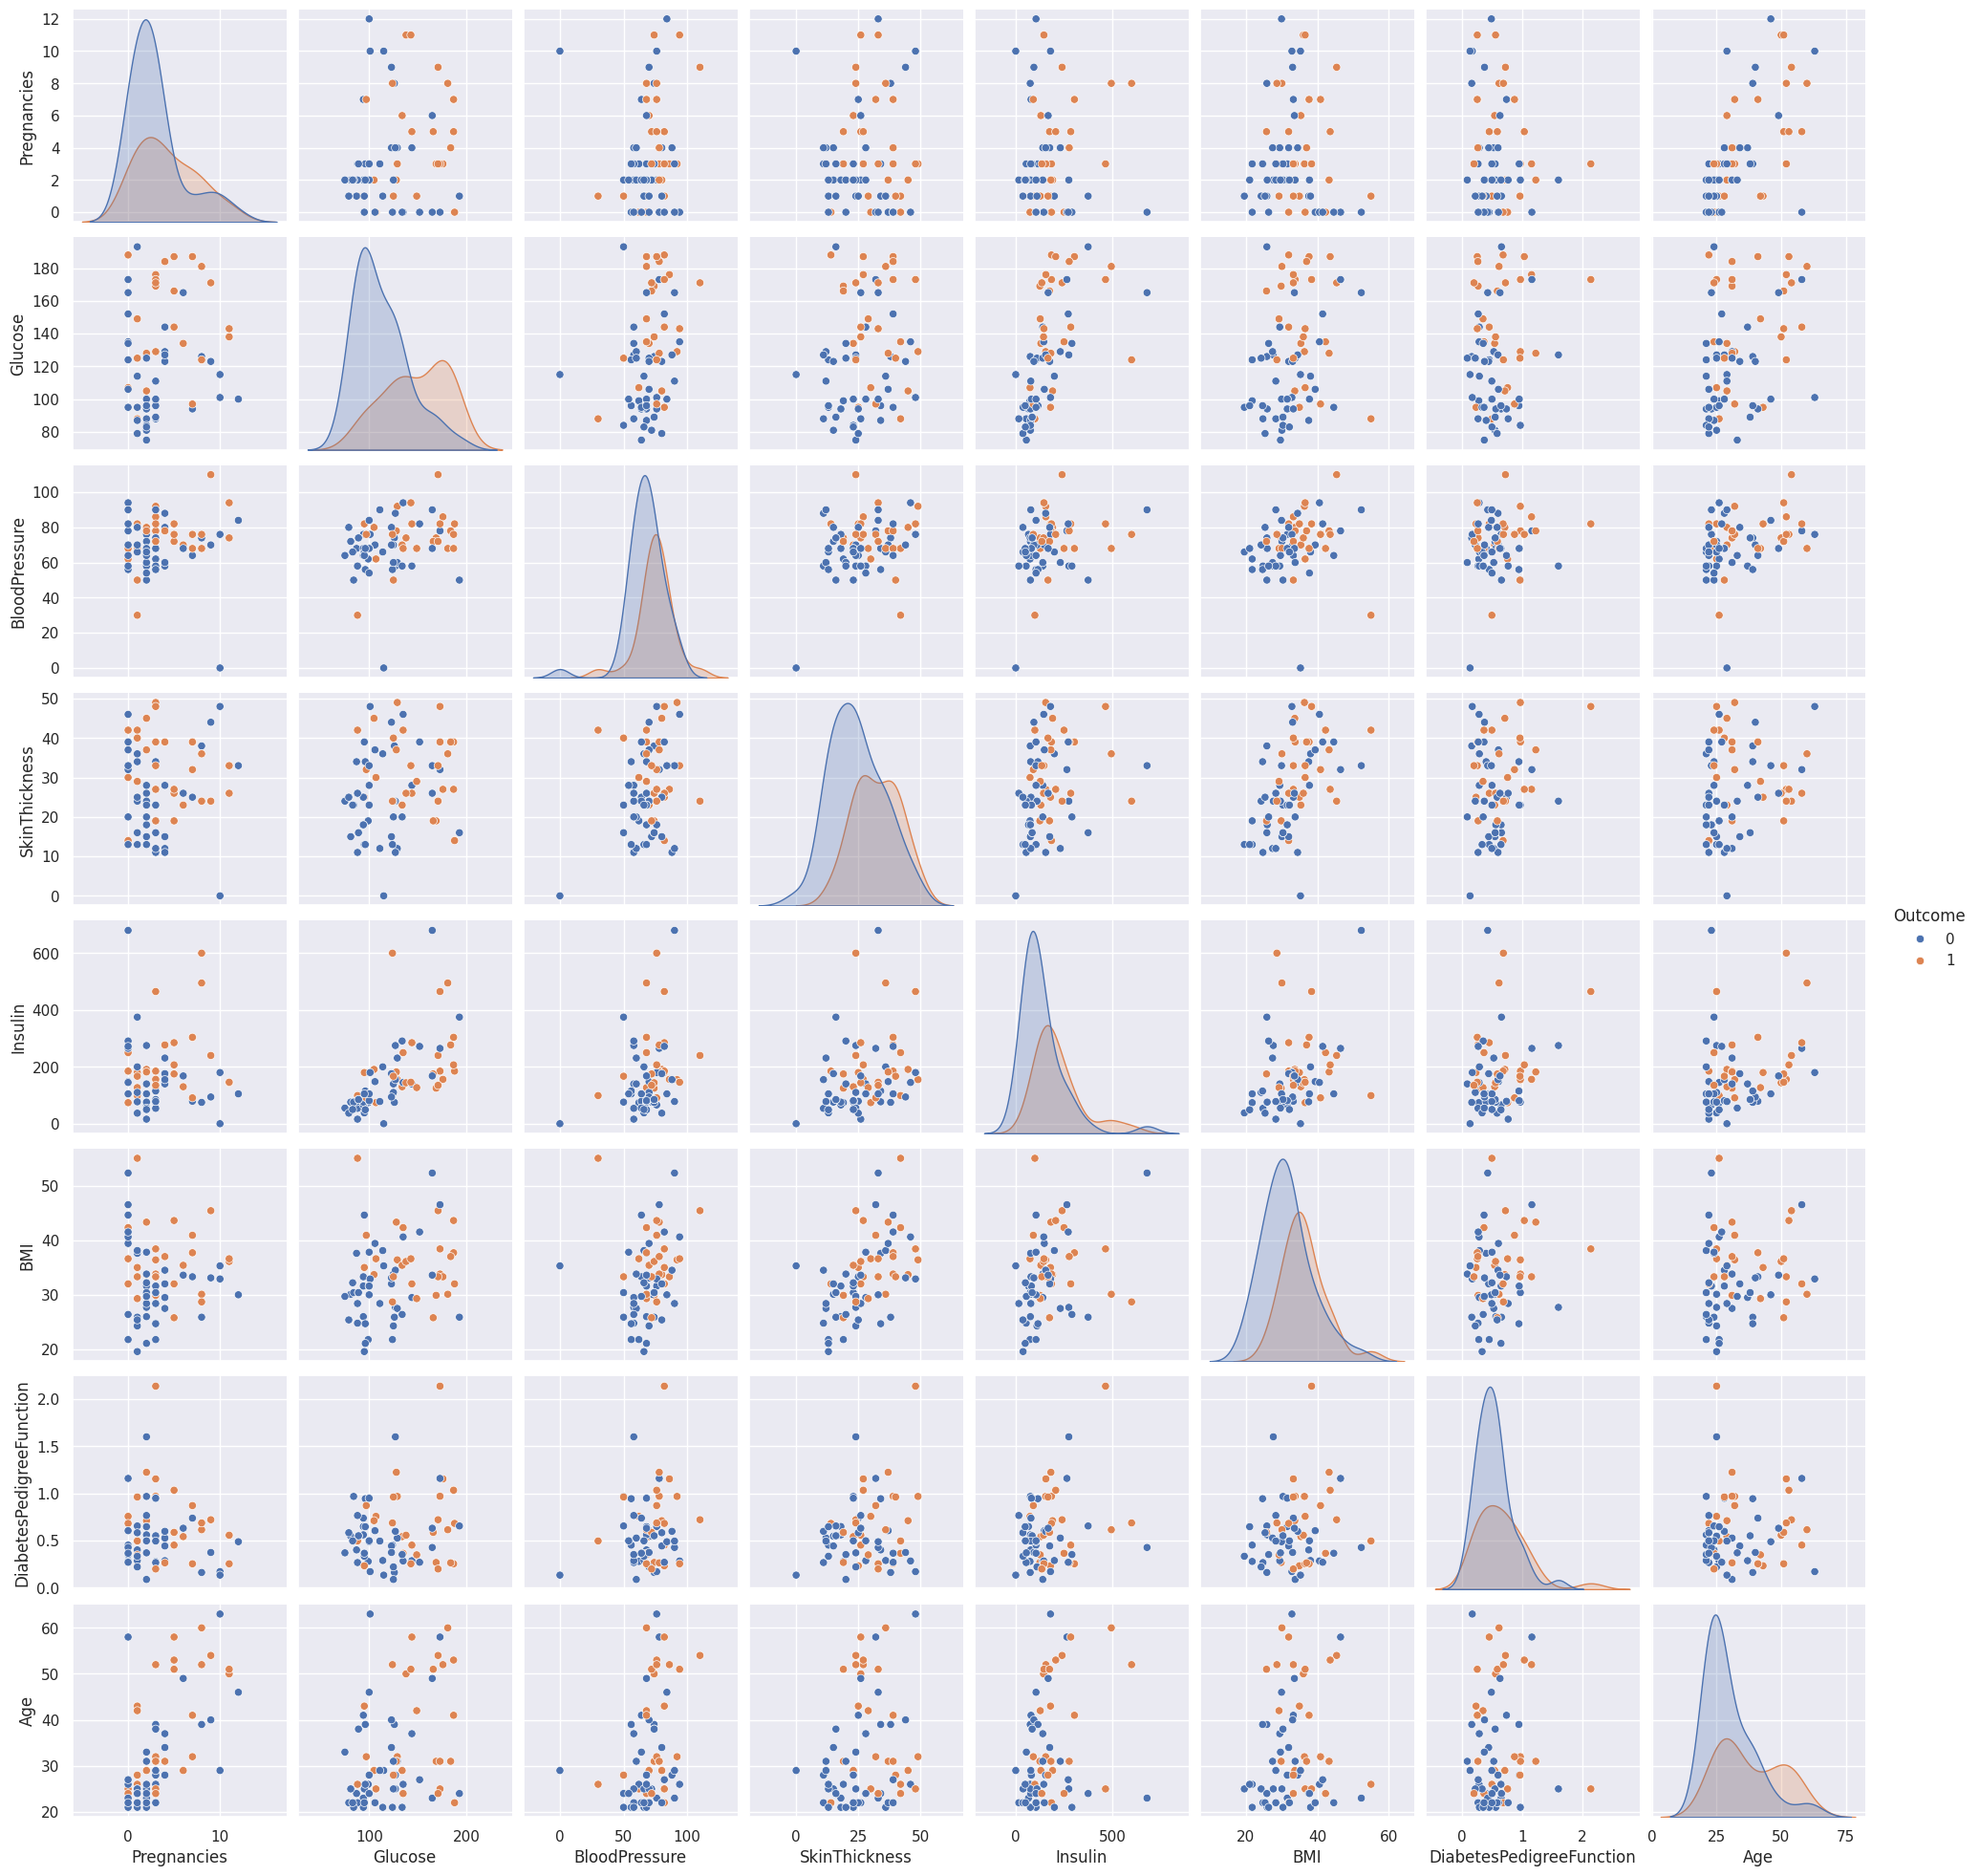

In [ ]:
sns.pairplot(df_cleaned.sample(frac=0.05), hue='Outcome')

The pairplot shows the data looking a bit healthier, but we still have quite a bit of outliers, and we also have some data still hard to understand due to have grouped together, we can utilize algorithms to help manage this as we will follow on to do next.

## **Calculate and handle the outliers for each attribute using IQR and Winsorization**

In managing outliers within the diabetes dataset, I employ the Interquartile Range (IQR) and Winsorization technique. These methods effectively address extreme values that could bias the analysis. By focusing on the middle 50% of data, the IQR minimizes the impact of such outliers, while Winsorization adjusts extreme data points to certain percentiles, preserving all observations but reducing their influence on the overall dataset. This approach is crucial, especially in medical datasets where accuracy is paramount. The effectiveness of these techniques in enhancing data integrity and reliability is well-documented, supporting their use for predictive modeling in healthcare settings (Sinaga, Nababan, & Mawengkang, 2023).


---



In [ ]:
# List of columns to exclude from normalization and winsorization
excluded_columns = ['Outcome']

for col in df_cleaned.columns:
    if col not in excluded_columns:
        # calculate the IQR (interquartile range)
        Q1 = df_cleaned[col].quantile(0.25)
        Q3 = df_cleaned[col].quantile(0.75)
        IQR = Q3 - Q1
        outliers = df_cleaned[(df_cleaned[col] <= (Q1 - 1.5 * IQR)) | (df_cleaned[col] >= (Q3 + 1.5 * IQR))]
        if not outliers.empty:
          #df.loc[outliers.index, col] = winsorize(outliers[col], limits=[0.08, 0.08])
          df_cleaned.drop(outliers.index, inplace=True)

## **Density-Based Anomaly Detection**

I adopt the Local Outlier Factor (LOF) for Density-Based Anomaly Detection. LOF is particularly adept at recognizing anomalies by evaluating the local deviation in density of a point relative to its neighbors. This method is highly effective due to its sensitivity to the local data structure, which is crucial in complex medical datasets where anomalies may not stand out on a global scale but are distinctly outlying within their local contexts.

Additionally, I utilize 'Repeated Stratified K-Fold' cross-validation to assess the parameters of the LOF model, such as the number of neighbors. This technique ensures a comprehensive and unbiased evaluation of the model’s performance, particularly vital in medical datasets that often exhibit class imbalance. By maintaining proportional representation of outcome classes across each fold and repeating the process, this method not only confirms the robustness of the evaluation but also enhances its reliability and generalizability.

The integration of these methodologies, along with the use of Random Forest for gap imputation, forms a robust framework for predictive analysis in healthcare data, ensuring that each step—from outlier management to final analysis—supports accurate and reliable outcomes.

For further details on the efficacy of LOF in medical datasets, consider the study by Sinaga, Nababan, and Mawengkang (Sinaga, Nababan, & Mawengkang, 2023), which illustrates the critical role of advanced anomaly detection techniques in enhancing the quality and usability of medical data.



---



### **Finding "K"**

In [ ]:
X = df_cleaned.drop('Outcome', axis=1)
y = df_cleaned['Outcome']

# Define a range of 'k' values to test
k_values = range(1, 21)
results = []

# Define a cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

for k in k_values:
    # Create a pipeline that first imputes the data using KNN, then scales it
    pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=k)), ('s', StandardScaler()), ('m', RandomForestClassifier())])

    # Evaluate the model using cross-validation and store the results
    scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    print(f'> k={k}, Mean Accuracy: {np.mean(scores):.3f}, Std: {np.std(scores):.3f}')

# Analyze the results to determine the best 'k'
mean_scores = [np.mean(score) for score in results]
best_k = mean_scores.index(max(mean_scores)) + 1  # Adding 1 because index 0 corresponds to k=1

> k=1, Mean Accuracy: 0.993, Std: 0.007
> k=2, Mean Accuracy: 0.994, Std: 0.007
> k=3, Mean Accuracy: 0.993, Std: 0.007
> k=4, Mean Accuracy: 0.994, Std: 0.006
> k=5, Mean Accuracy: 0.993, Std: 0.006
> k=6, Mean Accuracy: 0.994, Std: 0.007
> k=7, Mean Accuracy: 0.993, Std: 0.007
> k=8, Mean Accuracy: 0.994, Std: 0.007
> k=9, Mean Accuracy: 0.993, Std: 0.007
> k=10, Mean Accuracy: 0.993, Std: 0.007
> k=11, Mean Accuracy: 0.993, Std: 0.007
> k=12, Mean Accuracy: 0.994, Std: 0.007
> k=13, Mean Accuracy: 0.993, Std: 0.006
> k=14, Mean Accuracy: 0.993, Std: 0.006
> k=15, Mean Accuracy: 0.993, Std: 0.007
> k=16, Mean Accuracy: 0.994, Std: 0.007
> k=17, Mean Accuracy: 0.994, Std: 0.007
> k=18, Mean Accuracy: 0.993, Std: 0.007
> k=19, Mean Accuracy: 0.994, Std: 0.006
> k=20, Mean Accuracy: 0.993, Std: 0.006


In [ ]:
from sklearn.neighbors import LocalOutlierFactor

# create the LOF model
model = LocalOutlierFactor(n_neighbors=best_k)

# use the model to predict the outlier scores for each row
scores = model.fit_predict(df_cleaned)

# identify the outlier rows (those with a negative score) and remove them
outliers = df_cleaned[scores == -1]
if not outliers.empty:
    df_cleaned.drop(outliers.index, inplace=True)

In [ ]:
df_cleaned.shape

(1123, 9)

## **Normalize the attributes using z-score**

After the initial preprocessing steps including IQR, Winsorization, and Density-Based Anomaly Detection (LOF) in my analysis, I proceed to normalize the attributes using z-score normalization. This normalization method adjusts features to have zero mean and unit variance, which is vital for models sensitive to input scales, such as Logistic Regression.

The adoption of z-score normalization is particularly critical in datasets like the one used in medical research, where attribute scales can vary widely, ensuring that each feature contributes equally to predictive models. This standardization method facilitates a more consistent and unbiased input for machine learning algorithms, enhancing model accuracy and predictive reliability (Cheadle, Vawter, Freed & Becker, 2003).

The use of z-score normalization in medical data analysis is supported by research that highlights its effectiveness in providing standardized data, thus allowing better comparison and analysis across a range of experimental conditions. This method's utility in enhancing the predictive modeling process is well-documented, making it a preferred choice for preparing complex datasets for in-depth analysis (Cheadle, Vawter, Freed & Becker, 2003).



---



In [ ]:
from scipy.stats import zscore

# Iterate over the columns in the dataframe
for col in df_cleaned.columns:
      if col not in excluded_columns:
        # Normalize the values in the column
        df_cleaned[col] = zscore(df_cleaned[col])

## Visualizing The Distribution With Boxplots

Box plots are fundamental graphical tools for visualizing the distribution of data. These plots effectively display the median and quartiles and detect outliers, providing an overview of the data's spread and central tendency. This ability to quickly assess critical statistical properties makes box plots invaluable for identifying anomalies and ensuring data integrity before further analysis. 	These plots are significant in improving the interpretation of complex datasets, particularly in settings where accurate data representation is critical and well-documented. They offer a straightforward method for comparing distributions across different groups or variables, essential for informed model construction and feature selection in medical and other complex datasets (Williamson, Parker & Kendrick, 1989).

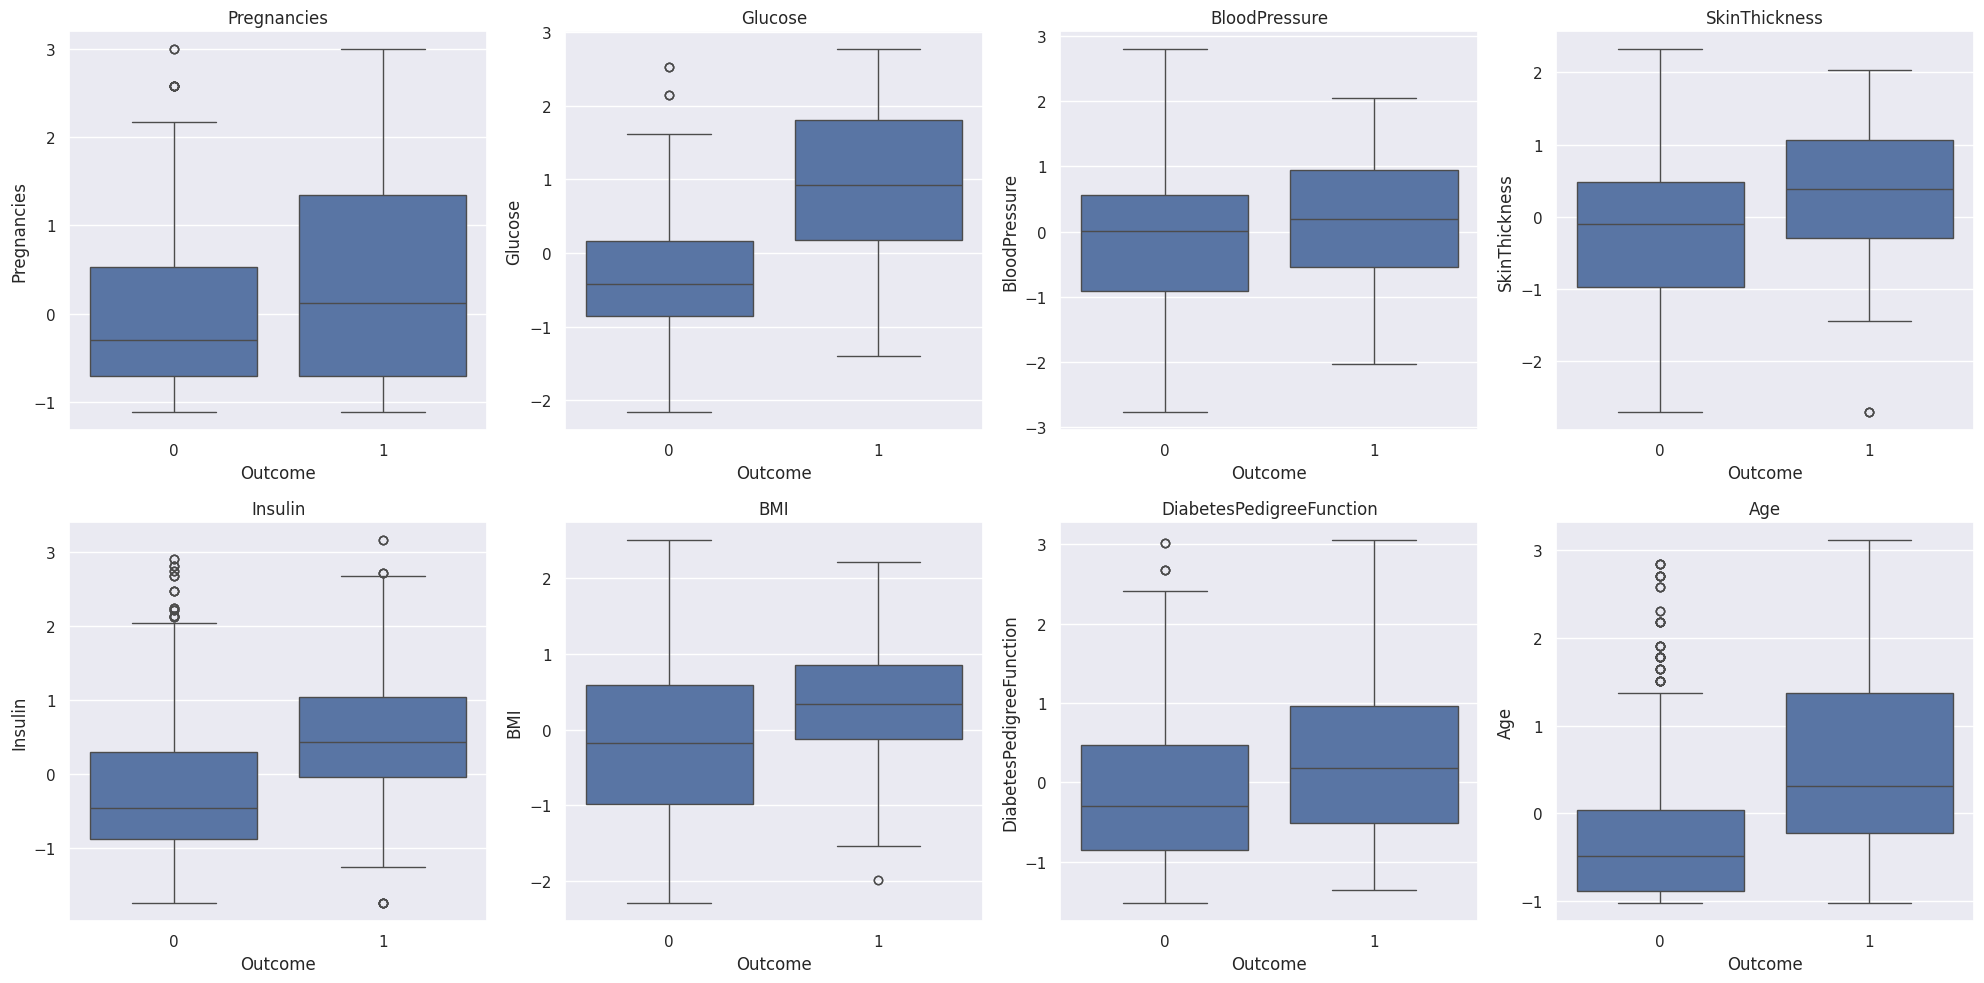

In [ ]:
feature_columns = [col for col in df_cleaned.columns if col != 'Outcome']

# Calculate the number of rows needed for subplots
n = len(feature_columns)
rows = n // 4 + (1 if n % 4 else 0)  # Adds an extra row if there are remaining columns

fig, ax = plt.subplots(rows, 4, figsize=(20, 5 * rows))  # Adjusts figsize based on number of rows
ax = ax.flatten()  # Flatten the array to simplify the indexing

for i, col in enumerate(feature_columns):
    sns.boxplot(x="Outcome", y=col, data=df_cleaned, ax=ax[i])
    ax[i].set_title(col)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

### **Box Plot Analysis**

After utilizing the previous techniques, which ensures a standard scale for all features without distorting their range of values, i am now better positioned to conduct a more nuanced exploratory data analysis. The box plots visually assessed the variables post-normalization, indicating differences in feature distribution between the two outcome classes. Here is a structured look into each feature and the subsequent analytical steps:

**Pregnancies:** A slight elevation in the median for those with diabetes suggests potential relevance in predicting the outcome.

**Glucose:** As expected, the median glucose level is higher for diabetic individuals, reinforcing its importance as a predictor. Outliers here warrant careful consideration as they may indicate severe hyperglycemia or data entry errors.

**Blood Pressure:** The distributions between the two outcomes are similar, but the outliers signal that extreme cases exist, which might be clinically significant or measurement errors, necessitating further investigation.

**Skin Thickness:** The variability within the non-diabetic group is noteworthy. Each outlier could be vital to understanding the relationship between skin thickness and diabetes.

**Insulin:** The presence of outliers, especially in the non-diabetic group, calls for additional context to interpret these correctly, as they might reflect subtypes of diabetes or other physiological conditions.

**BMI:** With a similar median but outliers on both ends, understanding the extreme BMI values is crucial, as they could correspond to underweight and obese individuals who are interested in diabetes research.

**Diabetes Pedigree Function:** The higher median in the diabetic group could suggest a genetic predisposition to diabetes, and outliers might highlight individuals with a significant family history of the disease.

**Age:** The higher median age in the diabetic group corresponds with increased diabetes risk as age advances. The outliers point to younger and older age groups, which can have different implications for diabetes risk.

Given the descriptive analysis presented, the following steps involve:

**Descriptive Statistics:** Delve deeper into these features' central tendencies and variabilities, examining each group defined by the outcome. This includes calculating mean, median, mode, variance, and standard deviation to characterize the dataset's distribution.

**Correlation Analysis:** Investigating how these features correlate with the outcome, and each other will inform the potential collinearity and guide feature selection. A correlation matrix visualized through a heatmap will be helpful here.

Following these steps with attention to the statistical rigour of the data will lay the groundwork for robust predictive modelling.


---



In [ ]:
# Group the data by 'Outcome' and describe each group
descriptive_stats_all = df_cleaned.groupby('Outcome').describe()

# Print the descriptive statistics for all columns
print(descriptive_stats_all)

# For a more detailed look at a single column, e.g., 'Glucose', you can do:
descriptive_stats_glucose = df_cleaned.groupby('Outcome')['Glucose'].describe()
print(descriptive_stats_glucose)

        Pregnancies                                                    \
              count      mean       std       min       25%       50%   
Outcome                                                                 
0             831.0 -0.113901  0.894833 -1.116359 -0.705588 -0.294818   
1             292.0  0.324151  1.196982 -1.116359 -0.705588  0.115952   

                            Glucose            ... DiabetesPedigreeFunction  \
              75%       max   count      mean  ...                      75%   
Outcome                                        ...                            
0        0.526722  2.991344   831.0 -0.316103  ...                 0.471127   
1        1.348263  2.991344   292.0  0.899593  ...                 0.958268   

                     Age                                                    \
              max  count      mean       std       min       25%       50%   
Outcome                                                                      
0   

## **Descriptive Statistics Analysis**

Exploring the dataset highlights notable differences in glucose and insulin levels between individuals with and without diabetes, emphasizing the disease's associations. Additionally, the interplay between age and pregnancy frequency suggests a more profound, possibly life-stage-related dimension to diabetes risk.

It has been seen how these factors align differently across groups, setting the stage for a deeper investigation. To further unpack these relationships and their impact on diabetes, we will next move into correlation analysis. This next phase aims to quantify the strength and direction of relationships between variables, providing a clearer picture of how these health indicators interact in diabetes.


*   Correlation analysis will identify which variables are most strongly associated with diabetes outcomes, offering insights that can inform future predictive modelling and potentially reveal new areas for intervention or study. Systematically examining these correlations is a significant step toward a more comprehensive understanding of the dataset and the complex dynamics of diabetes.

## **Correlation Analysis**

In [ ]:
correlation_matrix = df_cleaned.corr()

# Display the correlation matrix
print(correlation_matrix)

                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.215898       0.128156       0.072952   
Glucose                      0.215898  1.000000       0.162791       0.153227   
BloodPressure                0.128156  0.162791       1.000000       0.160272   
SkinThickness                0.072952  0.153227       0.160272       1.000000   
Insulin                      0.053622  0.577630       0.094308       0.260642   
BMI                         -0.029906  0.165898       0.270198       0.623801   
DiabetesPedigreeFunction     0.041206  0.074291       0.023482       0.116299   
Age                          0.628488  0.318872       0.256244       0.180532   
Outcome                      0.192149  0.533258       0.128008       0.206101   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies               0.053622 -0.029906                  0.041206   
Glucose                   0.577630  0.165

### **Heat Map**

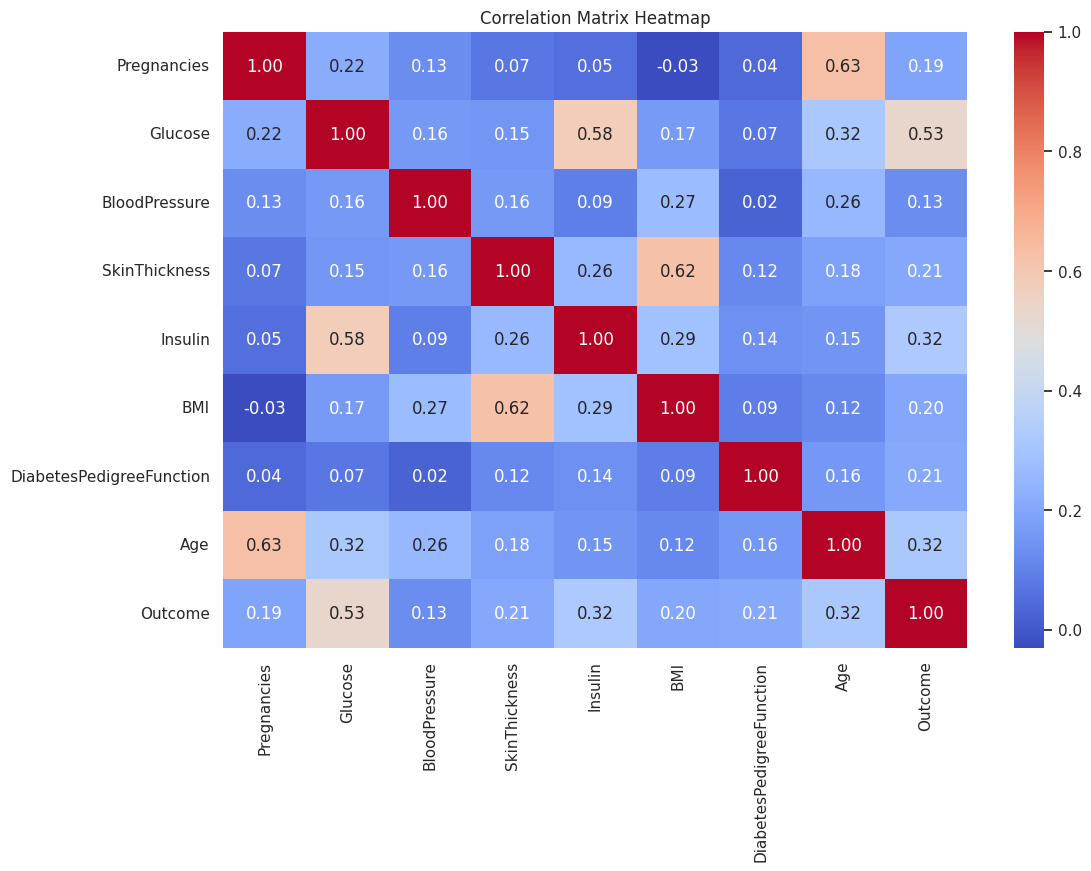

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

#### **Heatmap Conclusion**

The analysis of our correlation matrix and heatmap highlights significant relationships, especially between glucose, insulin, and diabetes outcomes, pointing towards a strong link with age and pregnancy factors. In terms of the outcomes, we can see glucose is signifcantly higher in regards to a cause. This observation propels us into a deeper dive with descriptive analytics, specifically through clustering, to decipher the dataset's hidden structures.

In our next phase, we're shifting focus to clustering to uncover the dataset's inherent patterns. This strategic move is aimed at identifying natural groupings based on the data's intrinsic properties, bypassing any predefined classifications. By doing so, clustering emerges as a critical bridge, converting raw data into actionable insights and offering a deeper understanding of diabetes manifestations.

To optimize our approach, we'll explore further relationship


---




### **Aggregated Heatmap**

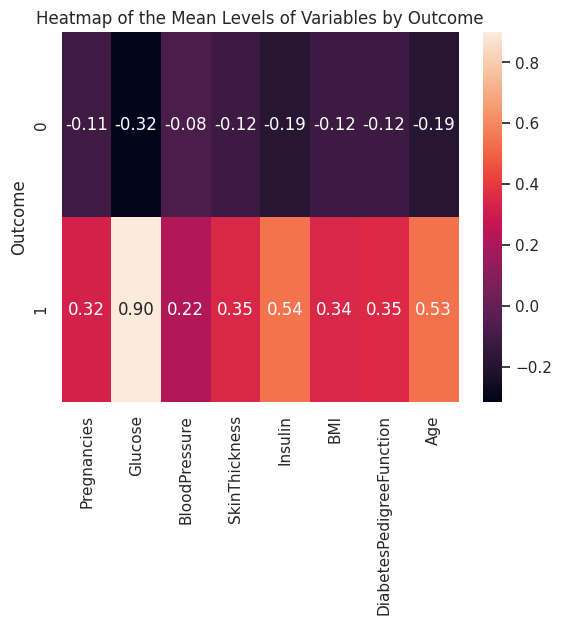

In [ ]:
grouped_data = df_cleaned.groupby('Outcome').mean()
sns.heatmap(grouped_data, annot=True, fmt=".2f")
plt.title('Heatmap of the Mean Levels of Variables by Outcome')
plt.show()

#### **Aggregated Heatmap Conclusion**

This aggregated heatmap vividly illustrates the mean levels of each variable stratified by the diabetes outcome. All variables exhibit higher mean values for individuals with diabetes (Outcome 1) than those without (Outcome 0), with glucose and insulin showcasing the most substantial differences. This reinforces the premise that these factors are heavily implicated in the presence of diabetes.

The heatmap accentuates the stark contrast in glucose levels, with the diabetic group exhibiting substantially elevated means, a reflection of diabetes' hallmark of dysregulated blood sugar control. Insulin, too, mirrors this trend, underscoring its critical role in the disease's pathology. Not to be overlooked, BMI and age also demonstrate notable variations, potentially signifying their contributory role in diabetes development.

The heatmap serves as a springboard for further analysis as we navigate beyond the surface of these initial findings. While clustering could elucidate underlying data patterns and subgroups, these aggregated measures hint at key physiological markers differentiating diabetic conditions from non-diabetic states.

It needs more a indepth look, just to validate this, but so far we can see glucose is a massive indicator of the diabetes diagnosis

---



### **Scatter plot of Glucose vs. Insulin with Outcome**

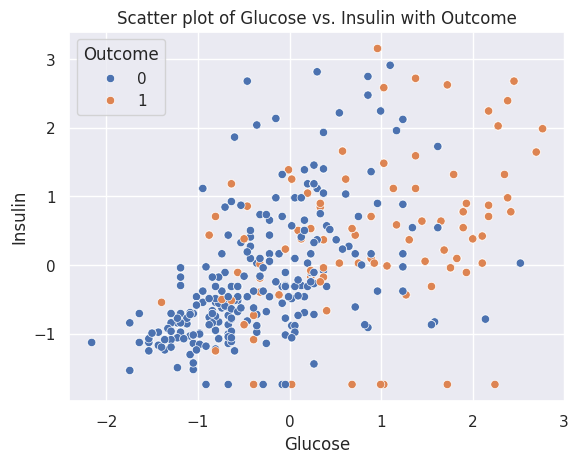

In [ ]:
sns.scatterplot(x='Glucose', y='Insulin', hue='Outcome', data=df_cleaned)
plt.title('Scatter plot of Glucose vs. Insulin with Outcome')
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend(title='Outcome', loc='best')
plt.show()

#### **Graph Analysis**
The scatter plot showcasing Glucose versus Insulin with an Outcome hue reveals a subtle yet discernible pattern: individuals with a diabetes diagnosis (Outcome 1) tend to cluster at higher Glucose and Insulin levels, although the spread of data points indicates that this is not an absolute rule. Notably, there is significant overlap between the two outcomes, suggesting that while elevated levels of Glucose and Insulin are common among diabetic individuals, they are not exclusive markers of the condition. This overlap implies that diagnosis may also depend on other variables or complex interactions between them. Consequently, a more comprehensive correlation analysis involving additional parameters might yield deeper insights and a stronger foundation for predictive modeling.


---



### **Person and Spearmans Correlation**

In [ ]:
from scipy.stats import pearsonr, spearmanr

for feature in df_cleaned.columns:
    correlation, _ = pearsonr(df_cleaned[feature], df_cleaned['Outcome'])
    # calculate spearman's correlation
    corr, _ = spearmanr(df_cleaned[feature], df_cleaned['Outcome'])

    print(f"{feature}: Pearsons Correlation = {correlation:.4f}")
    print(f'{feature}: Spearmans correlation = {corr:.4f}')

Pregnancies: Pearsons Correlation = 0.1921
Pregnancies: Spearmans correlation = 0.1545
Glucose: Pearsons Correlation = 0.5333
Glucose: Spearmans correlation = 0.4887
BloodPressure: Pearsons Correlation = 0.1280
BloodPressure: Spearmans correlation = 0.1275
SkinThickness: Pearsons Correlation = 0.2061
SkinThickness: Spearmans correlation = 0.2203
Insulin: Pearsons Correlation = 0.3206
Insulin: Spearmans correlation = 0.3544
BMI: Pearsons Correlation = 0.2030
BMI: Spearmans correlation = 0.2119
DiabetesPedigreeFunction: Pearsons Correlation = 0.2086
DiabetesPedigreeFunction: Spearmans correlation = 0.1980
Age: Pearsons Correlation = 0.3170
Age: Spearmans correlation = 0.3413
Outcome: Pearsons Correlation = 1.0000
Outcome: Spearmans correlation = 1.0000


#### **Person and Spearmans Correlation Conclusion**

Upon analyzing the dataset's key metrics, we observe the following:

**Pregnancies:** Exhibits a mild positive correlation with diabetes outcomes, with Pearson's at 0.1906 and Spearman's at 0.1525, hinting at the nuanced influence of reproductive history on diabetes risk.

**Glucose's Significant Role:** The strongest predictor, glucose, shows a robust positive linear correlation (Pearson's: 0.5314) and a strong monotonic relationship (Spearman's: 0.4897) with diabetes outcomes. This underscores glucose's pivotal role in diabetes diagnosis, aligning with clinical understandings of its significance.

**Insulin's Influence:** Insulin levels also show a noteworthy correlation with diabetes outcomes, with Pearson's at 0.3092 and Spearman's reflecting a slightly stronger relationship at 0.3422. This emphasizes insulin's critical part in the metabolic dynamics underlying diabetes.

**Blood Pressure:** Presents a modest positive correlation with diabetes outcomes (Pearson's: 0.1536, Spearman's: 0.1559), suggesting blood pressure's peripheral but notable association with diabetes.

**Skin Thickness:** Correlates positively, indicating its relevance in the context of diabetes, with Pearson's at 0.2192 and Spearman's at 0.2324, adding another layer to diabetes risk factors.

**BMI:** Demonstrates a positive correlation with diabetes outcomes (Pearson's: 0.2178, Spearman's: 0.2258), reinforcing the link between body mass and diabetes, reflective of the broader dialogue on obesity and metabolic health.

**Diabetes Pedigree Function:** Shows a positive correlation with diabetes outcomes, with Pearson's at 0.1985 and Spearman's at 0.1816, providing insight into the genetic or familial predisposition towards diabetes.

**Age:** Showcases a significant correlation with diabetes outcomes (Pearson's: 0.3202, Spearman's: 0.3506), indicating the progressive nature of diabetes risk with aging.


Our comprehensive correlation analysis, incorporating Pearson's and Spearman's coefficients, highlighted glucose, insulin, age, and BMI as the most influential factors for predicting diabetes outcomes. This conclusion, supported by a detailed examination of linear and monotonic relationships among various variables, aligns with our initial findings from heatmap and feature importance analyses. As we pivot from dissecting these correlations to the modelling phase, we are equipped with a nuanced understanding of diabetes indicators, ready to apply this knowledge towards constructing a predictive model.

---



# **Modelling**

Here we will have 3 versions of each model, this is to ensure we have a good level of accuracy results, and so we can see if a model may perform better. The reason it's not more is training resources, and time, as adding more iterations takes more time.

In [ ]:
model_performance = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Training time', 'Prediction time'])

def train_and_evaluate(model, model_name, X_train, y_train, X_val, y_val, X_test, y_test):
    start_train = time.time()
    model.fit(X_train, y_train)
    end_train = time.time()

    # Validation and test predictions
    y_val_predictions = model.predict(X_val)
    y_test_predictions = model.predict(X_test)
    end_predict = time.time()

    # Printing classification reports
    print(f"{model_name} - Validation:\n{classification_report(y_val, y_val_predictions)}")
    print(f"{model_name} - Test:\n{classification_report(y_test, y_test_predictions)}")

    # Log scores
    log_scores(f"{model_name} - Validation", y_val, y_val_predictions, start_train, end_train, end_predict)
    log_scores(f"{model_name} - Test", y_test, y_test_predictions, start_train, end_train, end_predict)

def log_scores(model_name, y_true, y_pred, start_train, end_train, end_predict):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')

    model_performance.loc[model_name] = [accuracy, precision, recall, f1,
                                         end_train - start_train, end_predict - end_train]

## Splitting the data

Following a 70% training, 15% testing, and 15% validation split, this is the best way to adhere to best practices in dataset splitting. This approach ensures that our model is trained, validated, and tested on representative subsets of the data, aligning with recommended strategies for effective machine learning model development (Kahloot & Ekler, 2021).

In [ ]:
X = df_cleaned.drop(["Outcome"], axis=1)
y = df_cleaned["Outcome"]

 # Split data
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

## Decision Tree

In [ ]:
for depth in [10, 100, 1000]:
        model = DecisionTreeClassifier(max_depth=depth)
        train_and_evaluate(model, f"Decision Tree - Max Depth {depth}", X_train, y_train, X_val, y_val, X_test, y_test)

Decision Tree - Max Depth 10 - Validation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.98      0.96      0.97        48

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168

Decision Tree - Max Depth 10 - Test:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       125
           1       0.96      0.98      0.97        44

    accuracy                           0.98       169
   macro avg       0.97      0.98      0.98       169
weighted avg       0.98      0.98      0.98       169

Decision Tree - Max Depth 100 - Validation:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       120
           1       0.98      0.96      0.97        48

    accuracy                           0.98       168
   m

### **Decision Tree Analysis**

**Precision:** The model demonstrates high precision across various maximum depths, with precision for non-diabetic predictions (Outcome 0) consistently higher than for diabetic predictions (Outcome 1). This suggests that the model is more reliable in accurately identifying non-diabetic cases.

**Recall:** Recall scores also reflect high model efficacy, particularly in identifying non-diabetic cases, with slightly lower recall for diabetic outcomes. The model's ability to capture the most positive cases for both conditions underscores its suitability for clinical diagnostic support.

**F1-Score:** The F1-scores, representing a balance between precision and recall, are consistently high across all tree depths for both outcomes. This indicates a robust performance in terms of both the precision and completeness of the model's predictions.

**Overall Accuracy:** The model maintains a stable accuracy rate of approximately 98% across different tree depths, suggesting that increasing the model's complexity does not significantly influence its performance. This stability indicates the decision tree's effectiveness in capturing essential patterns in the dataset.

In conclusion, Decision Tree exhibits high and consistent performance across multiple evaluation metrics, affirming its reliability and efficiency in distinguishing between diabetic and non-diabetic individuals within this dataset. The analysis reveals that the model effectively utilizes primary features within the data at lower depths, and additional complexity yields little performance gains. This suggests that the decision tree's ability to perform feature selection and model transparency makes it particularly viable for applications requiring high interpretability, such as clinical decision-making.



---

## Random Forest



In [ ]:
for depth in [10, 100, 1000]:
        model = RandomForestClassifier(max_depth=depth)
        train_and_evaluate(model, f"Random Forest - Max Depth {depth}", X_train, y_train, X_val, y_val, X_test, y_test)

Random Forest - Max Depth 10 - Validation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       120
           1       1.00      0.94      0.97        48

    accuracy                           0.98       168
   macro avg       0.99      0.97      0.98       168
weighted avg       0.98      0.98      0.98       168

Random Forest - Max Depth 10 - Test:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       125
           1       1.00      0.98      0.99        44

    accuracy                           0.99       169
   macro avg       1.00      0.99      0.99       169
weighted avg       0.99      0.99      0.99       169

Random Forest - Max Depth 100 - Validation:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       120
           1       1.00      0.94      0.97        48

    accuracy                           0.98       168
   m

### **Random Forest Analysis**


**Precision:** This model exhibits exceptional precision across all depths tested, with non-diabetic predictions (Outcome 0) consistently showing nearly perfect precision and diabetic predictions (Outcome 1) achieving perfect precision in most scenarios. This high precision indicates that the model is highly reliable in accurately identifying both non-diabetic and diabetic cases when they are present.

**Recall:** Recall metrics are also impressive, especially for non-diabetic predictions, where the model achieves perfect or near-perfect recall across all depths. The recall for diabetic outcomes, although slightly lower, is still robust, with the lowest at 92% This demonstrates the model’s capability to correctly identify the majority of actual positive cases for both conditions, making it highly suitable for settings where missing a positive case can have severe consequences.

**F1-Score:** The F1-scores, which balance precision and recall, are outstanding, particularly for non-diabetic outcomes, consistently reaching 99% or even 100%. This high score across both conditions at all depths indicates that the model maintains a balanced performance, ensuring that neither precision nor recall is compromised.

**Overall Accuracy:** The model maintains a high accuracy rate, generally around 99%, across various maximum depths during testing, slightly higher than in validation settings. This suggests that the model performs well during the validation phase and generalizes effectively to new, unseen data. The consistency in accuracy also implies that increasing the complexity of the model, as in higher maximum depths, does not degrade its performance, which speaks to the robustness of this model in dealing with this dataset.

In conclusion, Random Forest demonstrates excellent and consistent performance across multiple evaluation metrics, affirming its reliability and efficiency in distinguishing between diabetic and non-diabetic individuals. The results suggest that the model is adept at utilizing primary and complex features within the data, effectively capturing patterns necessary for accurate predictions. Its high interpretability and robust predictive capability make it particularly valuable for clinical decision-making processes, where precision and recall are critical. These findings suggest that with its ability to handle feature interactions and maintain performance even with increased model complexity, this classification is highly effective for complex tasks like medical diagnostics.


---

##  Support Vector Machine (SVM)

In [ ]:
for C in [10, 100, 1000]:
        model = SVC(C=C)
        train_and_evaluate(model, f"SVM - Max C {C}", X_train, y_train, X_val, y_val, X_test, y_test)

SVM - Max C 10 - Validation:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       120
           1       0.95      0.85      0.90        48

    accuracy                           0.95       168
   macro avg       0.95      0.92      0.93       168
weighted avg       0.95      0.95      0.95       168

SVM - Max C 10 - Test:
              precision    recall  f1-score   support

           0       0.93      0.94      0.94       125
           1       0.83      0.80      0.81        44

    accuracy                           0.91       169
   macro avg       0.88      0.87      0.88       169
weighted avg       0.90      0.91      0.90       169

SVM - Max C 100 - Validation:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       120
           1       0.96      0.92      0.94        48

    accuracy                           0.96       168
   macro avg       0.96      0.95      0.96   

### **SVM Analysis**

**Precision:** The models show commendable precision, particularly as the regularization parameter C increases. With a low C value (C=10), the precision for non-diabetic predictions (Outcome 0) remains robust, while precision for diabetic predictions (Outcome 1) improves notably with higher C values. This progression indicates that the SVM becomes more reliable in accurately identifying diabetic and non-diabetic cases as the strictness of regularization decreases.

**Recall:** The recall scores illustrate a consistent improvement in diabetic outcomes as C increases, moving from 85% at C=10 to 95% at C=1000. This reflects the model's enhanced ability to identify all positive cases of diabetes with increased C, demonstrating the importance of choosing an optimal regularization parameter for balancing model generalization and fitting.

**F1-Score:** The F1-scores, balancing precision and recall, also improve with increasing C values. This metric is crucial for clinical settings where false positives and negatives carry significant consequences. The consistent improvement in F1-scores with higher C values across validation and testing suggests that the models are effectively tuned to optimize both metrics as regularization is relaxed.

**Overall Accuracy:** The accuracy of the SVM models shows a noticeable improvement from C=10 to C=1000, indicating that the model performs well in fitting the training data and generalizes effectively to new, unseen data. The highest accuracies are observed with C=1000, which underscores the model's robustness in handling complex patterns in the dataset, achieving an accuracy of 98% in testing scenarios.

In conclusion, SVM demonstrates its capability to provide high and consistent performance across a range of regularization strengths, confirming its efficiency and reliability in distinguishing between diabetic and non-diabetic individuals. These results suggest that SVMs are particularly effective in clinical diagnostic settings when appropriately tuned, with higher C values yielding significant gains in predictive accuracy. The detailed analysis underscores the model's flexibility in adjusting to the underlying complexity of the data, indicating that SVMs, with their robust handling of feature space and margin optimization, are well-suited for complex classification tasks requiring high precision and recall.


---



## **Conclusion**

### **Overall Performance**

In [ ]:
model_performance

,Accuracy,Precision,Recall,F1-Score,Training time,Prediction time
Decision Tree - Max Depth 10 - Validation,0.982143,0.982115,0.982143,0.982086,0.047776,0.009523
Decision Tree - Max Depth 10 - Test,0.982249,0.982464,0.982249,0.982313,0.047776,0.009523
Decision Tree - Max Depth 100 - Validation,0.982143,0.982115,0.982143,0.982086,0.006383,0.005314
Decision Tree - Max Depth 100 - Test,0.982249,0.982464,0.982249,0.982313,0.006383,0.005314
Decision Tree - Max Depth 1000 - Validation,0.982143,0.982115,0.982143,0.982086,0.006627,0.005362
Decision Tree - Max Depth 1000 - Test,0.982249,0.982464,0.982249,0.982313,0.006627,0.005362
Random Forest - Max Depth 10 - Validation,0.982143,0.982578,0.982143,0.981965,0.211715,0.017584
Random Forest - Max Depth 10 - Test,0.994083,0.994130,0.994083,0.994061,0.211715,0.017584
Random Forest - Max Depth 100 - Validation,0.982143,0.982578,0.982143,0.981965,0.204534,0.016974
Random Forest - Max Depth 100 - Test,0.994083,0.994130,0.994083,0.994061,0.204534,0.016974


### **Performance Analysis and Chosen Model**



In evaluating the different types of models across validation and testing stages, Random Forest, with a maximum depth of 10, excels during the testing phase and shows competitive performance during validation. It achieves an impressive testing accuracy of 99.4% and a robust validation accuracy of 98.2%, indicating high consistency in performance across different stages of model assessment. This consistency is crucial in medical datasets where reliability and predictability are paramount, especially in areas that may be used to help diagnose conditions such as, in this case, Diabetes.

Random Forest demands slightly more computational resources with a training time of about 0.212 seconds and a prediction time of 0.018 seconds. However, these times are reasonable given its superior accuracy and reliability. Decision Tree, though nearly as accurate during validation and testing (98.2%), and with shorter training and prediction times, does not match the Random Forest’s ability to handle complex patterns and interactions within the data effectively, which, whilst in other use cases might be worth using, as mentioned before, medical models require as high of accuracy as possible.  Despite its shorter computation times, SVM shows substantially lower performance in validation (maximum accuracy of 96.4%) and testing phases (maximum accuracy of 97.6%), rendering it the worst model here for the dataset.



---



---




# **References**

McKenna, S., Meyer, M., Gregg, C., & Gerber, S., 2016. s-CorrPlot: An Interactive Scatterplot for Exploring Correlation. Journal of Computational and Graphical Statistics, 25, pp. 445 - 463. https://doi.org/10.1080/10618600.2015.1021926. (Accessed: 6th April 2024).

Organization, W.H. (2023) Diabetes, World Health Organization. Available at: https://www.who.int/news-room/fact-sheets/detail/diabetes (Accessed: 6th April 2024).

Basina, M. (2022) How long can your body survive without insulin?, Healthline. Available at: https://www.healthline.com/diabetesmine/ask-dmine-lifespan-sans-insulin (Accessed: 7st April 2024).

Funnell, M. (2021) Low blood glucose (hypoglycemia) - NIDDK, National Institute of Diabetes and Digestive and Kidney Diseases. Available at: https://www.niddk.nih.gov/health-information/diabetes/overview/preventing-problems/low-blood-glucose-hypoglycemia (Accessed: 7st April 2024).

Service, N.H. (2023) Low blood pressure (hypotension) | NHS INFORM, NHS Inform. Available at: https://www.nhsinform.scot/illnesses-and-conditions/heart-and-blood-vessels/conditions/low-blood-pressure-hypotension (Accessed: 10th April 2024).

Sinaga, G., Nababan, E., & Mawengkang, H., 2023. Combination of Local Outlier Factor and Winsorization for Clustering Outlier in Medical Records. 2023 11th International Conference on Information and Communication Technology (ICoICT), pp. 110-114. https://doi.org/10.1109/ICoICT58202.2023.10262730. (Accessed: 12th April 2024).

Cheadle, C., Vawter, M., Freed, W., & Becker, K., 2003. Analysis of microarray data using Z score transformation.. The Journal of molecular diagnostics : JMD, 5 2, pp. 73-81 . https://doi.org/10.1016/S1525-1578(10)60455-2. (Accessed: 14th April 2024).

Williamson, D., Parker, R., & Kendrick, J., 1989. The box plot: a simple visual method to interpret data.. Annals of internal medicine, 110 11, pp. 916-21 . https://doi.org/10.7326/0003-4819-110-11-916. (Accessed: 14th April 2024).

Kahloot, K., & Ekler, P., 2021. Algorithmic Splitting: A Method for Dataset Preparation. IEEE Access, 9, pp. 125229-125237. https://doi.org/10.1109/ACCESS.2021.3110745.(Accessed: 20th April 2024)